<a href="https://colab.research.google.com/github/Ryuma-code/Dicoding-Analis-Data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Nurian Alyasa
- **Email:** alyasanurian@gmail.com
- **ID Dicoding:** nurian

## Menentukan Pertanyaan Bisnis

- Apakah curah hujan (kategori weathersit 4) mengurangi permintaan lebih signifikan dibandingkan hari berkabut (weathersit 2)?
- Apakah hari libur menyebabkan penurunan atau peningkatan permintaan penyewaan sepeda?
- Apakah terdapat perbedaan pola penggunaan antara pengguna casual dan registered dalam hal jam sibuk, hari kerja, atau musim?

### Kolom Data

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Import Semua Packages/Library yang Digunakan

Mengimport Library pandas,numpy untuk mengolah data. <br>
Mengimport Library matplotlib,seaborn untuk visualisasi data. <br>
Mengimport Library stremlit untuk mendokumentasikan hasil dengan web sederhana.

> Dikarenakan Ketika Mengimport Tidak Bisa Karena Streamlit Belum Ada Di Google Collab Sehingga Harus Menginstal Terlebih Dahulu

In [73]:
!pip install streamlit
!pip install geopandas

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import geopandas as gpd
from shapely.geometry import Point

## Data Wrangling

### Gathering Data

#### 1. Mengatur path untuk mengakses data

In [75]:
from google.colab import drive
drive.mount('/content/drive') # Mount to the existing '/content/drive' directory

data_direct= "/content/drive/MyDrive/Bike-sharing-dataset" # Now you can access your data

day_df = pd.read_csv(data_direct + "/day.csv")
hour_df = pd.read_csv(data_direct + "/hour.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 2. Membuat tabel awal untuk day

In [76]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 3. Membuat tabel awal untuk hour

In [77]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### **Insight:**
- Membuat table day
- Membuat table hour

### Assessing Data

 #### 1. Menilai data mulai dari **day**

##### Mendeteksi type, dan NaN

In [78]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Karena tidak ada data yang hilang/null data tidak perlu check dengan isna().  
Tapi sepertinya ada data yang salah type yaitu dteday-->type:(datetime), season-->type:(category), yr-->type:(category), mth-->type:(category), holiday-->type:(category), weekday-->type:(category), workingday-->type:(category), wheathersit-->mungkin bisa type;(category dan bisa diperjelas).





##### Mendeteksi Duplicate

> crosscheck



In [79]:
day_df.duplicated().sum()

0

##### Mendeteksi Invalid data

In [80]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Terdapat beberapa invalid data di hum min=0.00000(karena tidak bisa di bumi dengan 0 kelembapan), weathersit yang seharusnya max=4 disini max=3 dan beberapa salah hitung di cnt.

#### 2. Menilai **hour**

##### Menilai type, dan NaN

In [81]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Karena tidak ada missing value jadi bisa langsung ke duplicate.<br>
Type yang salah sama seperti day.

##### Menilai Duplicate

In [82]:
hour_df.duplicated().sum()

0

##### Mendeteksi invalid data

In [83]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Terdapat invalid value di min windspeed seharusnya tidak 0, dan cnt min seharusnya 0 juga bukan 1, dan juga hum seharusnya tidak 0 karena di bumi pasti ada kelembapan


#### **Insight:**
- Tidak ada missing value di keduanya.
- Tidak ada duplicate di keduanya.
- Terdapat Invalid value di **kedua data** yaitu hum seharusnya tidak bisa 0.
- Invalid value di **data day** wheathersit disitu max 3 sedangkan total seharusnya 4.
- Invalid value **data hour** min windspeednya seharusnya tidak 0.
- data yang salah typenya yaitu dteday-->type:(datetime).

### Cleaning Data

#### 1. Membersihkan day

##### Membenarkan type

In [84]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

check dengan info

In [85]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Semua data type sudah benar

In [86]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


##### Membenarkan hum


In [87]:
day_df['hum'] = day_df['hum'].replace(0, day_df['hum'].mean())
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628753,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


##### Ganti max wheathersit ke 4

In [88]:
day_df[day_df.weathersit == day_df.weathersit.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.627894,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627


In [89]:
day_df.weathersit.replace(day_df.weathersit.max(), 4, inplace=True)
day_df[day_df.weathersit == day_df.weathersit.max()]

<ipython-input-89-0d39efb53e79>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.weathersit.replace(day_df.weathersit.max(), 4, inplace=True)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,4,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,4,0.389091,0.385668,0.627894,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,4,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,4,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,4,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,4,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,4,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,4,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,4,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,4,0.254167,0.227913,0.882500,0.351371,57,570,627


Max weathersit sudah benar

#### 2. Membersihkan hour

##### Membenarkan type

In [90]:
day_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Check dengan info

In [91]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

type sudah benar

##### Membenarkan hum

In [92]:
hour_df['hum'] = hour_df['hum'].replace(0, hour_df['hum'].mean())
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628023,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Membenarkan windspeed

In [93]:
hour_df['windspeed'] = hour_df['windspeed'].replace(0, hour_df['windspeed'].mean())
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628023,0.213943,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.099324,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [94]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628023,0.213943,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.099324,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


#### **Insight:**
-  Membenarkan hum
-Membenarkan weathersit
-Membenarkan windspeed
-Membenarkan type data

## Exploratory Data Analysis (EDA)

### Explore ...

#### Explorasi day_df sebagai data utama karena dengan data terlengkap dan terlama

In [95]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011-01-16 15:02:12.968536320,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.424077,0.495385,0.474354,0.628753,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-01-08 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2011-01-16 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2011-01-24 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2011-02-02 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.645889,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


##### Mengecek perbulan

In [96]:
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()
monthly_rentals

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


terbanyak di bulan ke 8

##### Pengecekkan workingday

In [97]:
workingday_rentals = day_df.groupby('workingday')['cnt'].sum()
workingday_rentals

,cnt
workingday,
0,1000269
1,2292410


disini jelas kalau ketika working day lebih banyak

##### Mengecek cuaca

In [98]:
weather_workingday_rentals = day_df.groupby('weathersit')['cnt'].sum()
weather_workingday_rentals

,cnt
weathersit,
1,2257952
2,996858
4,37869


Jelas perbandinga dari cuaca ke-4(ekstrim) lebih sedikit penyewa

##### Perbandingan casual,regis= working

In [99]:
grouped_data = day_df.groupby('workingday')[['casual', 'registered']].sum()
grouped_data

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


Disini terlihat bahwa registered selalu lebih banyak dari casual, dan registered lebih sedikit ketika holiday daripada weekday, dan casual lebih banyak ketika holiday daripada weekday.

#### **Insight:**
- Paling banyak penyewa di bulan ke-8
- Lebih banyak penyewa ketika workingday
- Ketika cuaca ekstrim (weathersit-4) terdapat penurunan yang sangat besar di banding 2/1
- Terlihat bahwa registered selalu lebih banyak dari casual.
- registered lebih sedikit ketika holiday daripada weekday.
- casual lebih banyak ketika holiday daripada weekday.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

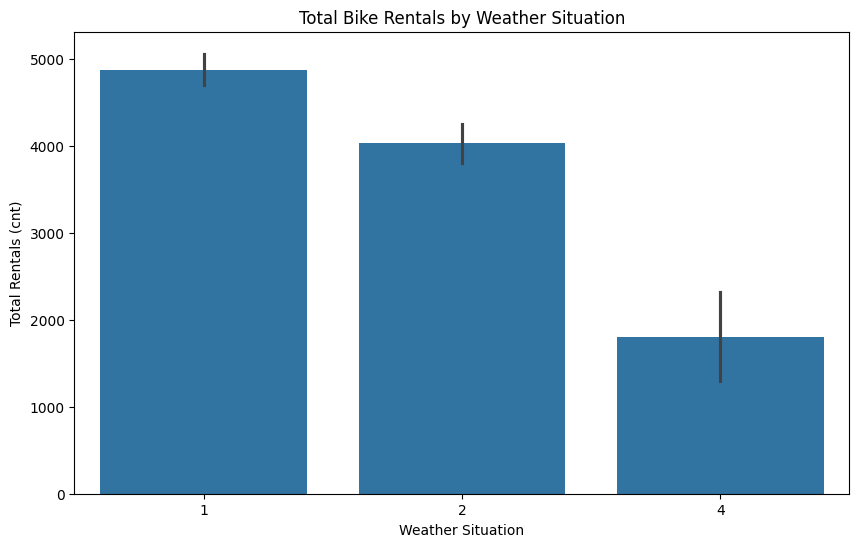

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.title('Total Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals (cnt)')
plt.show()

### Pertanyaan 2:

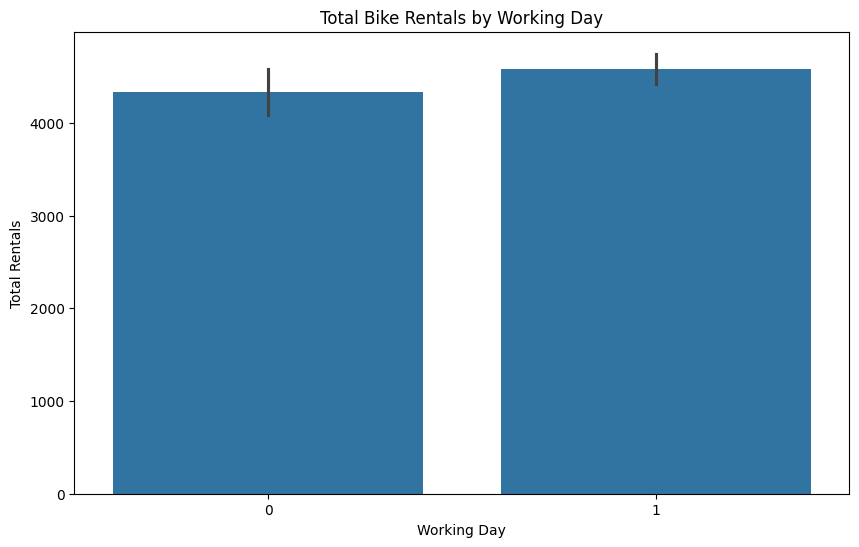

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=day_df)
plt.title('Total Bike Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Total Rentals')
plt.show()

### Pertanyaan 3:

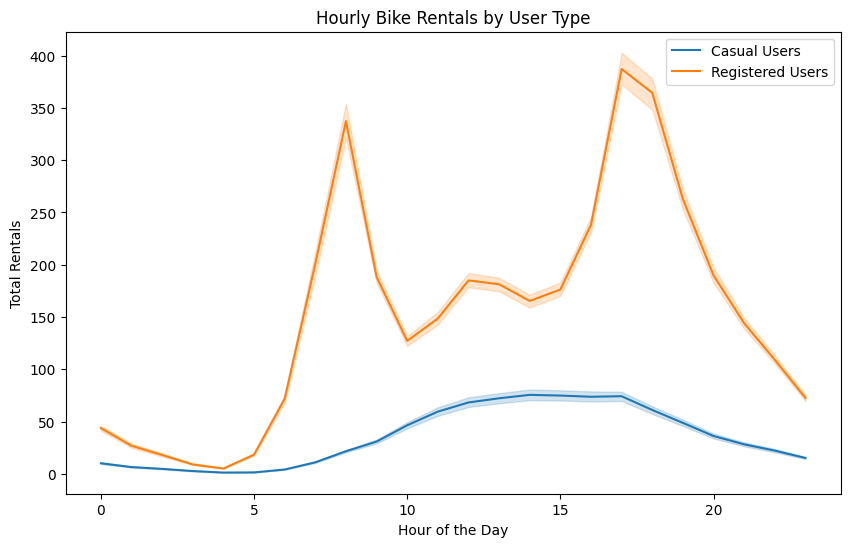

In [102]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='casual', data=hour_df, label='Casual Users')
sns.lineplot(x='hr', y='registered', data=hour_df, label='Registered Users')
plt.title('Hourly Bike Rentals by User Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

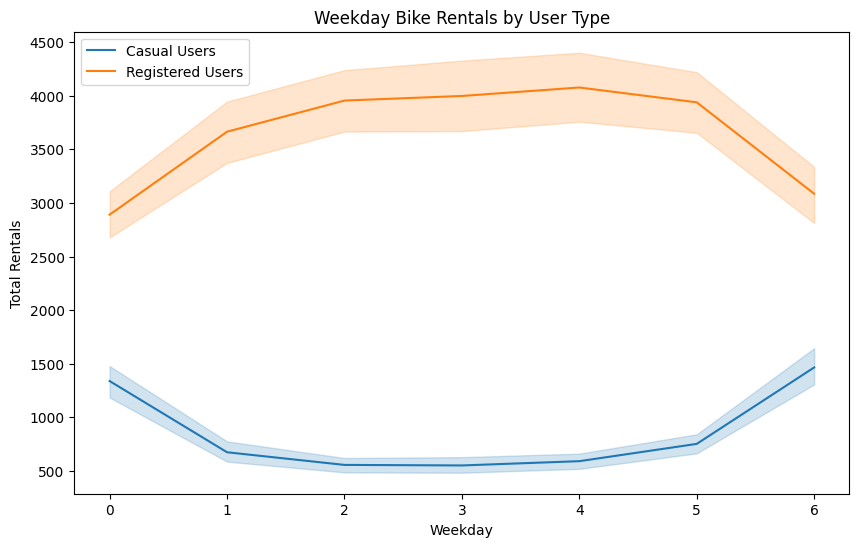

In [103]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='casual', data=day_df, label='Casual Users')
sns.lineplot(x='weekday', y='registered', data=day_df, label='Registered Users')
plt.title('Weekday Bike Rentals by User Type')
plt.xlabel('Weekday')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

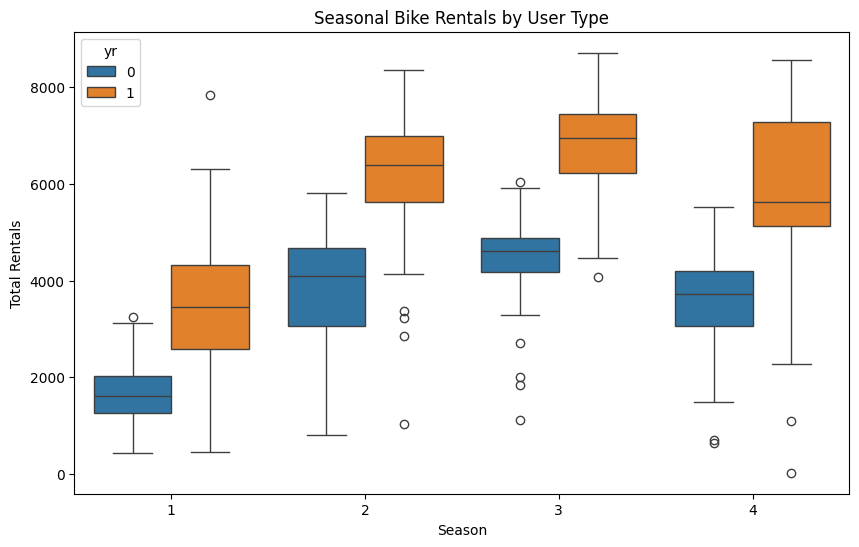

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', hue='yr', data=day_df)
plt.title('Seasonal Bike Rentals by User Type')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

### **Insight:**
- Aktivitas terbanyak ketika cuaca-1 dan terendah cuaca-4.
- Ketika Jam kerja registered jauh lebih banyak dari pada kasual.
- Ketika weekday aktivitas lebih banyak ketimbang holiday.
- Ketika holiday aktivitas registered menurun dan casual meningkat.
- Tahun 2012 memiliki lebih banyak user di setiap musimnya.

## Analisis Lanjutan (Opsional)

> Menggunakan clustering



2025-02-02 01:03:10.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 01:03:10.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 01:03:10.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 01:03:10.328 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 01:03:10.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


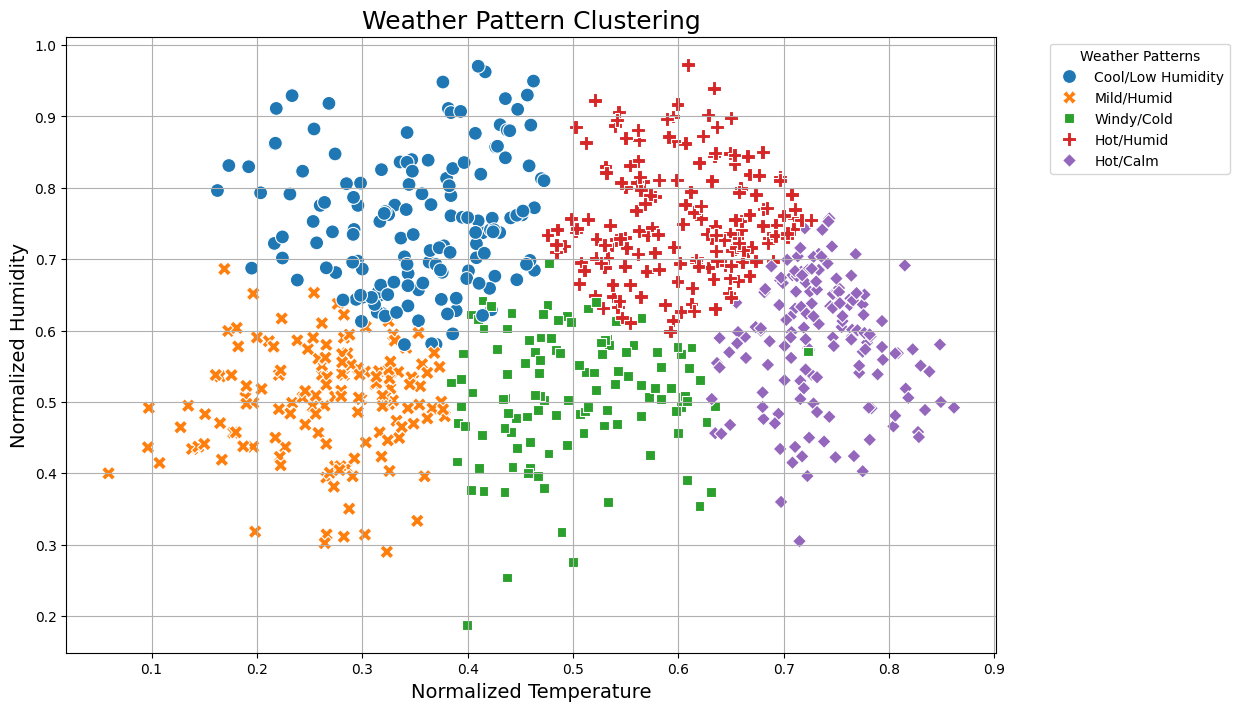

In [105]:
from sklearn.cluster import KMeans

features = ['temp', 'atemp', 'hum', 'windspeed']
X = day_df[features]

n_clusters = st.slider("Select number of clusters:", 2, 10, 5)

cluster_names = {
    0: "Cool/Low Humidity",
    1: "Hot/Calm",
    2: "Mild/Humid",
    3: "Windy/Cold",
    4: "Hot/Humid",
    5: "Extrem Weather"}

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
day_df['cluster'] = kmeans.fit_predict(X)

day_df['cluster_label'] = day_df['cluster'].map(cluster_names)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='temp',
    y='hum',
    hue='cluster_label',
    data=day_df,
    palette='tab10',
    s=100,
    style='cluster_label')

plt.title('Weather Pattern Clustering', fontsize=18)
plt.xlabel('Normalized Temperature', fontsize=14)
plt.ylabel('Normalized Humidity', fontsize=14)
plt.legend(title='Weather Patterns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [106]:
day_df[features].describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.628753,0.190486
std,0.183051,0.162961,0.140518,0.077498
min,0.059130,0.079070,0.187917,0.022392
25%,0.337083,0.337842,0.521041,0.134950
50%,0.498333,0.486733,0.627500,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


In [107]:
# Assuming you want to save the concatenated data of day_df and hour_df
# First, concatenate the dataframes
all_df = pd.concat([day_df, hour_df], axis=0)

# Then save it to a csv file
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Ya, ketika cuaca ekstrem (4) terdapat penurunan yang sangat signifikan sampai 50%+ daripada ketika cuaca 2, dan aktivitas terbanyak ada di cuaca 1.
- Secara umum terdapat penurunan ketika holiday khususnya dalam kategori registered, dan casual justru terdapat peningkatan tetapi total keseluruhan registered dan casual menurun.
- Diantara casual dan registered keduanya mengalami peningkatan ketika jam kerja, tetapi registered mengalami peningkatan signifikan di periode jam 5-10 dan jam 15-20 karena itu adalah jam berangkat dan pulang kerja.